# Modelling Faults Using Probability Distributions

Notes: this paper is under construction, using jupyter notebook to trace probabilistic distributions in python  
Version 1.6, Feb2017  
Requirements for jupiter file: python kernel 2.7, pyplot, numpy, scipy, math


### 1. Foreword

The customer just received your new delivery, a week after you are pulled into an urgent management meeting and told the customer found a defect during their testing that your team didn't catch and they have flagged it as project critical and showstopper. Who has never had to deal with such a situation when working on continuous delivery to external customers for large and complex projects? The next question to come is then: why did your testing teams not catch the issue before it reached the customer?  
The answer most of the time is that you did not find the issue during your own testing. And I am not saying your team isn't doing an excellent job at testing, but the era of the zero default is behind us and the challenges that continuous delivery gives to the testing teams are huge.  
Here I make the assumption that the issue is hard to reveal, such defect is commonly called a rare fault. This short paper aims at discussing rare faults, model them with statistical distributions and propose approaches to better test them.

Oher works have been written on statistical approaches linked to defects and faults. In [1] and [2] the author proposes a model to predict number of defect from code size values. [3] addresses the notion of time to failure. [4] gives a critique of such approaches and points at new axes of research based on machine learning techniques.

In this short paper I do not address prediction but proposes an approach to help fault identification and reproduction. In a first time we fit statistical distributions to failures found during testing to help identify underlying faults. In a second time we propose test approaches to improve the chances a finding different type of rare faults based on their classic statistical distributions. This approach is compared to fault treatment and reliability procedures as discussed in [5].

Below we go through the most classic distributions and associate faults and testing methods to them.


Note: In the distributions discussed below I am not considering discrete or continuous data values. Using fitting with different distributions you should be able to find one that model your data weel enough to apply the approach proposed.
For more details on distributions and fitting them, I advise reading the article from Aswath Damodaran, teacher at the Stern School of Business, New York University
http://people.stern.nyu.edu/adamodar/New_Home_Page/StatFile/statdistns.htm

You can find some examples of fitting here: https://github.com/selmgl/stats/blob/master/SciPy_NumPy_Usages.ipynb

### 2. Fault Distributions
Below we discuss fault categories, they are classified by the distribution that the defects take when they happen along time during testing. The x axis is testing time, the y axis is the number (or probability) of defect occurrences happening at time x. The distribution can be deduced from the data using fitting as explained above. An example of fitting is given in the file FaultStatistics_AnExample.ipynb on this same github.

The procedure from data gathering to fitting is simple:
1. go through normal testing process
2. gather failure times, group them in time slots so you get a number of datapoints which are number of failures vs. time, taking the middle of your time slot range as the time
3. use this dataset of nb.failure/times to go through distribution fitting

Note: This can require a large amount of data to be able to process through fitting. With small datasets (as can be the case for rare faults) a first "guess" can be done from preliminary data and use this first guess to progress further.


#### Geometric to Exponential Distributions (down and up ramps)

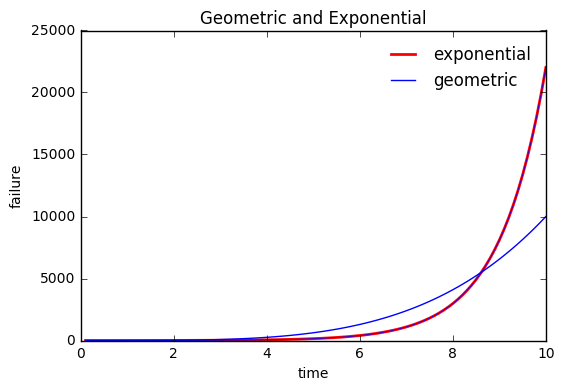

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import math as m

# create distribution
x=np.linspace(0.1,10,100)
expx=[m.exp(y) for y in x]

# clear graph context
plt.clf()
# plot different geometric and exponential distributions
# exponential with numpy and math
plt.plot(x,np.exp(x), 'r-', lw=2, label='exponential')
plt.plot(x,expx, 'b-', lw=0.5)
# geometric
plt.plot(x,x**4, 'b-', label='geometric')
# inverse of exponential 
#plt.plot(x,np.exp(1/x), 'r-', lw=2)
# display distribution
plt.title('Geometric and Exponential')
plt.ylabel("failure")
plt.xlabel("time")
plt.legend(loc='best', frameon=False)
plt.show()
# save png file
plt.savefig("ExponentialUp.png")

#### Late Faults
If during testing, most of the defects appear late during the testing cycle, your defects will fit to a geometric or exponential distribution. This type of distribution is linked to "late faults", these faults are revealed by long duration also called long time testing.  
When you test these defects will not appear unless you run the tests long enough, especially with an exponential distribution they will often be missed during testing.


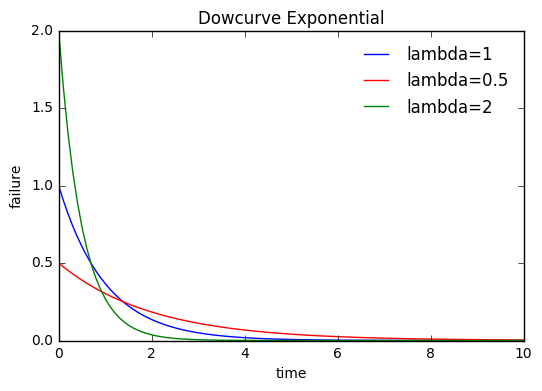

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

# create distribution
x=np.linspace(0,10,100)

# clear graph context
plt.clf()
# plot stats exponential distributions, scale=1/lambda
plt.plot(x,st.expon.pdf(x, loc=0, scale=1), 'b-', label='lambda=1')
plt.plot(x,st.expon.pdf(x, loc=0, scale=2), 'r-', label='lambda=0.5')
plt.plot(x,st.expon.pdf(x, loc=0, scale=0.5), 'g-', label='lambda=2')
# display distribution
plt.title('Dowcurve Exponential')
plt.ylabel("failure")
plt.xlabel("time")
plt.legend(loc='best', frameon=False)
plt.show()
# save png file
plt.savefig("ExponentialDown.png")

#### Early Faults
If your data fit to a down-ramp exponential most of the defects are observed early during testing. Because of the earliness of the defects they will be found during testing but their analysis will require specific testing to focus on these early phases. On systems such issues are often linked to initialization sequences.


#### Beta Distribution (bathtub curve)

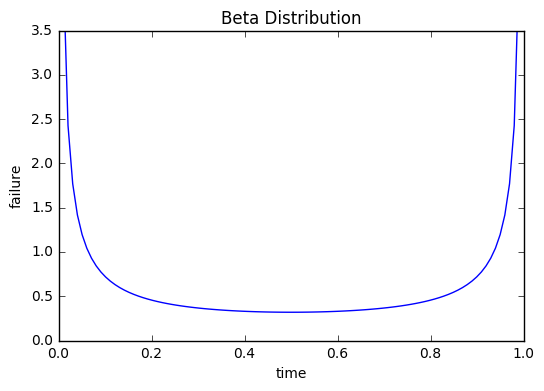

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

# create distribution
x=np.linspace(0,1,100)
a, b = 0.2, 0.2
rv = st.beta(a, b)

# clear graph context
plt.clf()
# plot stats distributions
plt.plot(x,rv.pdf(x), 'b-')
# display distribution
plt.title('Beta Distribution')
plt.ylabel("failure")
plt.xlabel("time")
plt.axis([0, 1, 0, 3.5])
plt.show()
# save png file
plt.savefig("Beta.png")

There are many other shapes for Beta distributions but this commonly called "bathtub" shape is very well known to reliability engineers.

#### Lifecycle Faults
If your defect data fits to this distribution most of the defects are found early or late during the testing. Such a distribution corresponds to lifecycle testing and the left part of the defects are called "early death" while the right part defects are "end of life".
Such distribution corresponds most of the time to hardware defects, either linked to imprefect hardware (early death) or aging (end of life). They are found on products using early (factory) testing and pre-emptive aging testing.


#### Binomial, Poisson, Normal Distributions (bell curve)

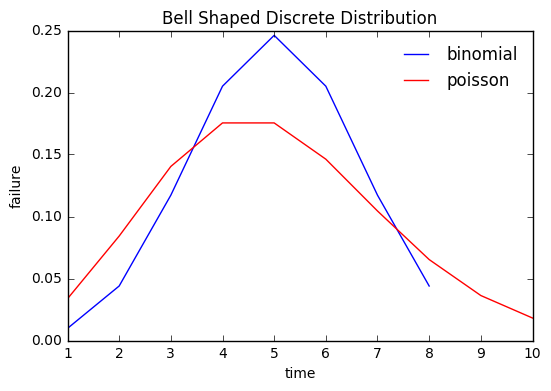

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

# create distribution
#x=np.linspace(0,20,100)
n, p = 10, 0.5 # symetric binomial centered on 10/2=5
mu = 5 # poisson average number of events (center)

#x = np.arange(0, 10, 0.01)
x = np.arange(st.binom.ppf(0.01, n, p),st.binom.ppf(0.99, n, p))
x2 = np.arange(st.poisson.ppf(0.01, mu),st.poisson.ppf(0.99, mu))

# clear graph context
plt.clf()
# plot stats distributions
plt.plot(x,st.binom.pmf(x, n, p), 'b-', label='binomial')
plt.plot(x2,st.poisson.pmf(x2, mu), 'r-', label='poisson')
# display distribution
plt.title('Bell Shaped Discrete Distribution')
plt.ylabel("failure")
plt.xlabel("time")
plt.legend(loc='best', frameon=False)
plt.show()
# save png file
plt.savefig("BinomialPoisson.png")

The poisson distribution is slightly skewed towards 0 but decreases with mu.

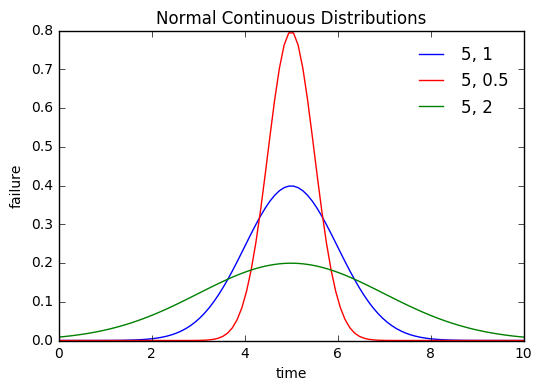

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

# create distribution
x=np.linspace(0,10,100)

# clear graph context
plt.clf()
# plot stats distributions
plt.plot(x,st.norm.pdf(x, loc=5, scale=1), 'b-', label='5, 1') # mean =5, std deviation =1
plt.plot(x,st.norm.pdf(x, loc=5, scale=0.5), 'r-', label='5, 0.5') # mean =5, std deviation =0.5
plt.plot(x,st.norm.pdf(x, loc=5, scale=2), 'g-', label='5, 2') # mean =15, std deviation =2

# display distribution
plt.title('Normal Continuous Distributions')
plt.ylabel("failure")
plt.xlabel("time")
plt.legend(loc='best', frameon=False)
plt.show()
# save png file
plt.savefig("Normal.png")

#### Classic System Failures
The most classic defects will fit to such a "bell shaped" curve. These defects take some testing time to be reproduced but most failures will happen without need for long duration tests.  
Most of the time such defects will not be linked to the specificities of the test sequence at the highest bell shape. They are often linked to an increase of stress on the system after some time of use. System aspects that can be considered as common issues linked to such defect distributions are linked to system resources: memory (all types), system storage (files, swap), system queues (for processes, files). These defects can be system wide or linked to a specific process.


#### Lognormal (assymetric)

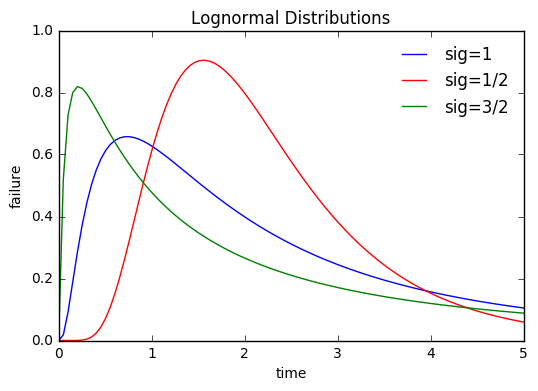

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

# create distribution
x=np.linspace(0,5,100)

# clear graph context
plt.clf()
# plot stats distributions, sigma is the shape parameter
plt.plot(x,st.lognorm.pdf(0.5*x, s=1), 'b-', label='sig=1') # sigma = 1
plt.plot(x,st.lognorm.pdf(0.5*x, s=0.5), 'r-', label='sig=1/2') # sigma = 0.5
plt.plot(x,st.lognorm.pdf(0.5*x, s=1.5), 'g-', label='sig=3/2') # sigma = 1.5

# display distribution
plt.title('Lognormal Distributions')
plt.ylabel("failure")
plt.xlabel("time")
plt.legend(loc='best', frameon=False)
plt.show()
# save png file
plt.savefig("Lognormal.png")

#### Early Failures
When your defect events fit to such a lognormal distribution, you are close to a down-ramp exponential, but the issue is not caused by the initial state or initilization of the system.  
Either it is a very common issue that is easy to reproduce once the first "sequence" of the testing is done (often system initilization).  
Or the defects is caused by a state in which the system is left after the first "sequence" of the tests (like a memory not freed).
Or this is due to the defect being caused by a specific part of the tests, and the distribution will change of sigma if you reorder the tests.


#### Uniform Distribution (flat curve)


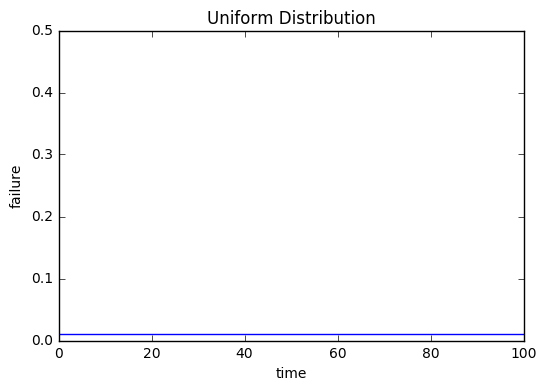

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

# create distribution
x=np.linspace(0,100,100)

mean, var, skew, kurt = st.uniform.stats(moments='mvsk')

# clear graph context
plt.clf()
plt.title('Uniform Distribution')
# plot uniform distribution, constant between loc and loc+scale
plt.plot(x,st.uniform.pdf(x, loc=0, scale=100))
# display distribution
plt.axis([0.0,100.0,0.0,0.5])
plt.ylabel("failure")
plt.xlabel("time")
plt.show()
# save png file
plt.savefig("Uniform.png")

#### Uniform Rare Fault
A fault is considered modelled by a uniform distribution when its appearance during test is not related to time, it will appear as well very early as very late. Such a fault becomes an issue when the chance of it appearing is very low. This makes reproduction hard and hence debug efforts costly.

The example taken in the figure above is of 1% chance every unit of time to see the fault appear, but the probability can be much lower.

In this case testing does not give us any pattern that can be linked to a statistical distribution. Such a defect needs to be analyzed using, for example, system traces so it is better identified. The goal is to be able to create specific focused testing to increase reproduction if debug cannot be done from the first occurrences.

### 3. Using Distributions to Address Faults

#### Beta Distribution (bathtub curve)
This is the classic hardware distribution. Early deaths are due to hardware production issues and late deaths are due to hardware aging.
These faults are rarely software faults and you should not encounter such a distribution when dealing with production of software, unless you also test your early hardware at the same time

#### Exponential Distribution (late)
When failures fit a late exponential distribution they nearly only or only happen late in time. This indicates the conditions for the failure to appear increase with time and are not present at the origin.  
These faults are most of the time linked to "leaks", these are commonly memory related (memory being preempted but not freed) or process related (processes not being killed/cleaned-up properly).  
To improve reproduction in this case we want to "accelerate time", i.e. create late conditions earlier in the testing cycle. This can be caused by creating fake charges on the system which can be memory or process related. This is a common stress testing taking up memory, processes, cpu/gpu time, ... with fake charges.

#### Exponential Distribution (early)
Failures fitting an early exponential distribution happen only early in time, from time 0.  
In such a case the fault is related to the origin, the condition of failure is present from the origin of the tests, in such a case it is important to analyze if the initial state of the test is linked to the system boot.  
Most of the time such faults are related to the system boot impacting the tests. It is even possible that any charge (not necessarily the tests) would reveal the fault.  
Here the first task is to point the fault to system boot or the test start. This can be done by letting the system stabilize before starting the test by giving it a rest time of a few minutes after its boot and before starting the tests.  
As boot failures are still important to find, specific system boot tests should also be performed as a standard stability test activity.

#### Lognormal Distribution
Fitting to a lognormal distribution indicates a behavior close to the one of the early exponential. The link to the time origin of the tests is less sure in this case.  
The same procedure as previously can be used (system stabilization before tests) but here the issue can also be due to the tests themselves starting.  
Changing the test order is a first approach to see if the behavior is the same or if it is linked to a specific test that was at the beginning during the test procedure. Such an issue can be avoided by changing the order of the tests as much as possible during the test experiments. Be aware that this random reordering will change a lognormal distribution into a uniform, or close to uniform, one. This can hide the issue if it is really linked to one specific test case.  
Identifying a subset of test cases and focusing retest on them is usually the best practice to have in such a case.

#### Normal Distribution
This distribution evolves further from the lognormal. The origin of time is now clearly not linked to the failures. A specific time during testing is though. As we don't have an exponential behavior we can also say that time isn't the primary factor so we don't have a leak" behavior.  
The most common behavior here is to have the issue linked to a series of test cases exercized over the high section of the distribution. It is once again possible to retest with a randomized sequence to see if the distribution shape disappears. The best option would be to focus testing, after analyzing the results, on the tests that can be linked to the high section of the normal distribution.  
If the normal distribution is very thin (short time period when the faults appear) focusing tests can really improve reproduction a lot.

#### Uniform Distribution
In most case a uniform distribution does not give us enough information by itself to decide on which action to take.  
This can be due to insufficient testing that could not produce enough results to fit to a more specific distribution.  
This can be due to failures being linked to a specific feature (audio, video ...) that is exercized at several points during testing. As explained earlier randomized ordering during test can hide information obtained through such fitting process.  
Failures should be analyzed to obtain more information and try to reorder/refocus tests if necessary and produce more meaningful results.


### 4. Pre-emptive Testing Planification

Several points have already be discussed in section 3. They are summarized below:
- order tests by features, keep ordering between experiments to reveal lognormal or normal failure distributions linked to specific a feature being exercized by the tests
- make sure the system is stabilized from boot before starting your tests, for that give the system a "rest time" after boot and before starting tests to get a clean initial state (obviously each test experiment should be separated from the other by a reset to the initial state, usually performed through a system reboot)
- use different tests to target specifically the early exponential and late exponential that are often linked to system issues more than features being tested

dg

### References
[1] F. Akiyama, “An Example of Software System Debugging”, Information Processing, vol. 71, pp. 353-379, 1971.

[2] N.E. Schneidewind and H. Hoffmann, “An Experiment in Software Error Data Collection and Analysis”, IEEE Trans. Software Eng., vol. 5, no. 3, May 1979.

[3] D. Potier, J.L. Albin, R. Ferreol, A, and Bilodeau, “Experiments with Computer Software Complexity and Reliability”, Proc. Sixth Int’l Conf. Software Eng., pp. 94-103, 1982.

[4] N.E. Fenton and M. Neil, "A Critique of Software Defect Prediction Models", IEEE Transactions on Software Engineering, Volume:25, Issue:5, Sep/Oct 1999

[5] M.R. Lyu Editor, "Handbook of Software Reliability Engineering", IEEE Computer Society Press, McGraw-Hill, ISBN 0-07-039400-8


-- Guillaume Lussier, 2017 --